#### Problem Statement:
 The Client Company helps students by telling them the probability of getting into IVY League Colleges based on 
 certain details entered by the students on their website. We have to help the Company in understanding what 
 factors are important in graduate admissions and how these factors are interrelated among themselves. It will also
 help predict one's chances of admission given the rest of the variables.

In [1]:
import numpy as np # Importing the basic libraries.
import pandas as pd

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
from sklearn.model_selection import train_test_split # For splitting training and testing data.
from sklearn.preprocessing import StandardScaler # For scaling the data
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [90]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [93]:
df=pd.read_csv("D:\\Scaler\\Projects\\Graduate Admission\\graduate admissions.csv") # Importing the dataset of the Company

In [94]:
df.head() # Viewing the data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape # Shape of data

(500, 9)

##### The dataset has 500 rows and 9 columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


##### There are no null values and columns are either float or continuous. No missing values.

In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


##### Columns such as GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA appear to be normally distributed with their means similar to medians.

In [15]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [16]:
df["Research"].unique()

array([1, 0], dtype=int64)

##### Here we can sese the different number of variables for each of the categories. Research has just 2 inputs - 0 or 1, 
##### Others have 5 to 84 different variables.

##### Let us drop the S. No Column from the analysis to prevent our model from taking it into consideration while making
##### the model.

In [95]:
df.drop(["Serial No."],axis=1,inplace=True)

In [96]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [25]:
df.shape

(500, 8)

##### We have now removed the Serial no. column from the dataset and now only have 8 columns.

### Univariate Analysis:

In [97]:
cols=df.columns[:6]
cols

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA'], dtype='object')

C:\Users\Dell\AppData\Local\Temp\ipykernel_21288\970354396.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[cols[i]], kde=False)


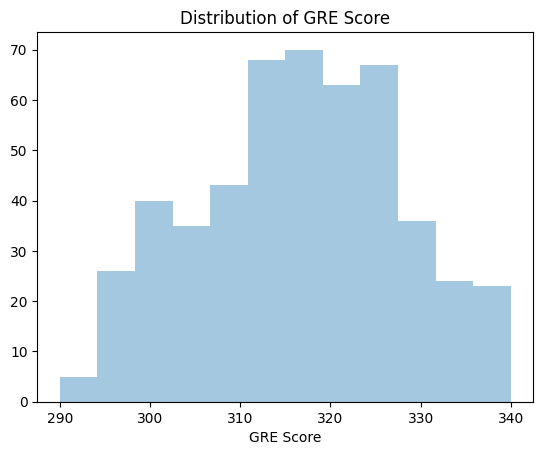

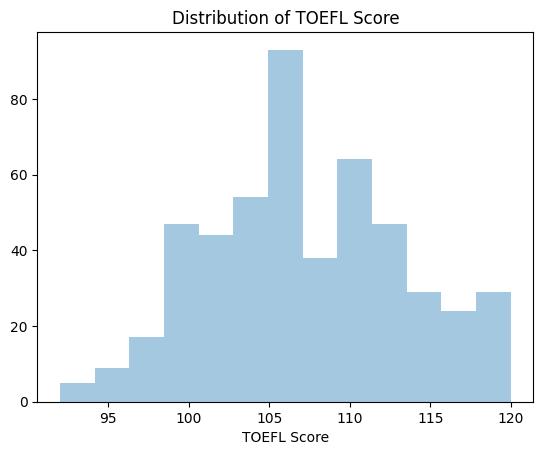

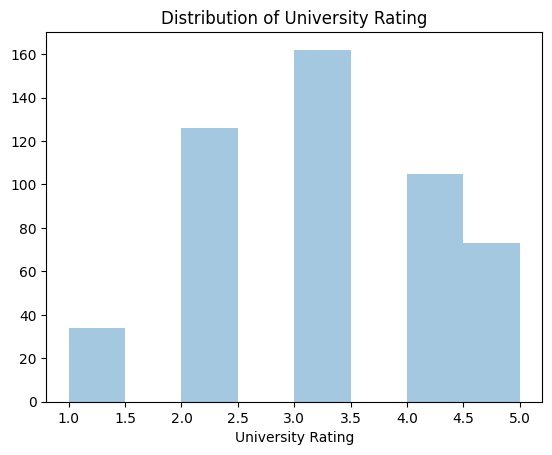

In [98]:
for i in range(len(cols)-3):
    fig = sns.distplot(df[cols[i]], kde=False)
    title_text="Distribution of "+str(cols[i])
    plt.title(title_text)
    plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_21288\1069449152.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[cols[i]], kde=False)


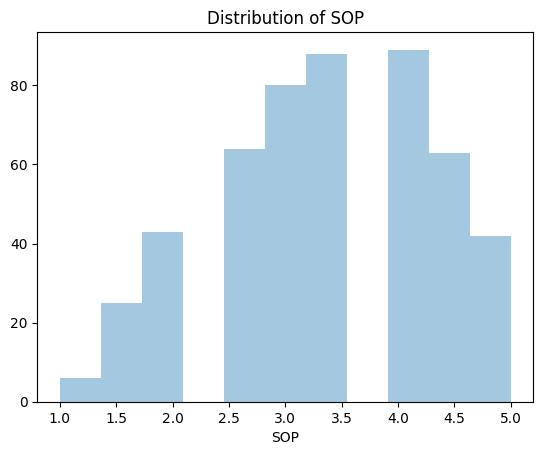

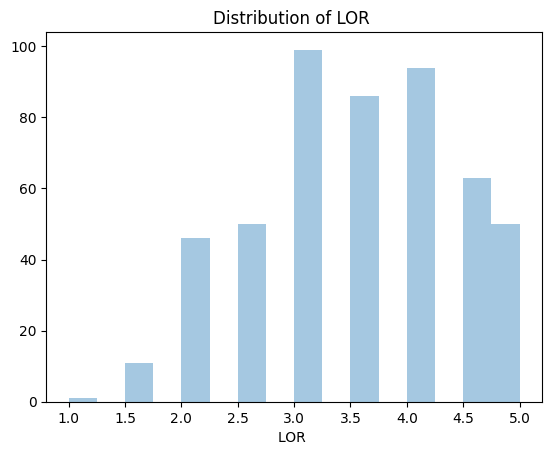

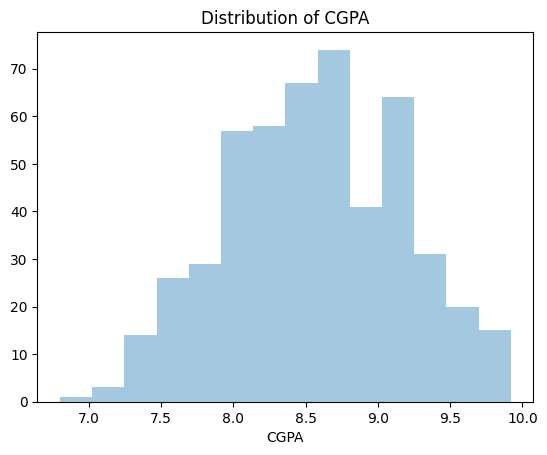

In [48]:
for i in range(3,len(cols)):
    fig = sns.distplot(df[cols[i]], kde=False)
    title_text="Distribution of "+str(cols[i])
    plt.title(title_text)
    plt.show()

##### We can see that students with both low, high amd medium scores applied for the Universities.

##### It can be said to follow nearly normal distribution.

### Bivariate Analysis

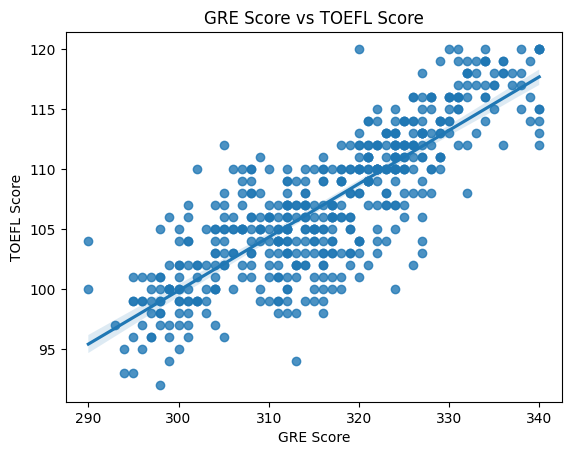

In [99]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

##### People with High TOELF score also have high GRE Score, which can be due to the availability of verbal section in both the exams and generally studious students scoring well in all the exams.

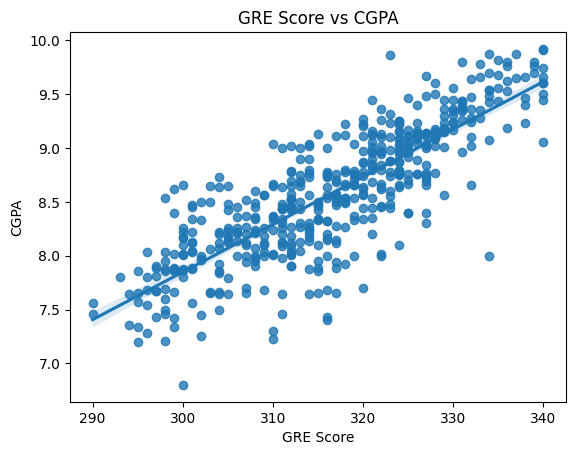

In [50]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

##### Here also we see a similar pattern, People with High CGPA are having high GRE score suggesting they might be studious, hard working or smart.

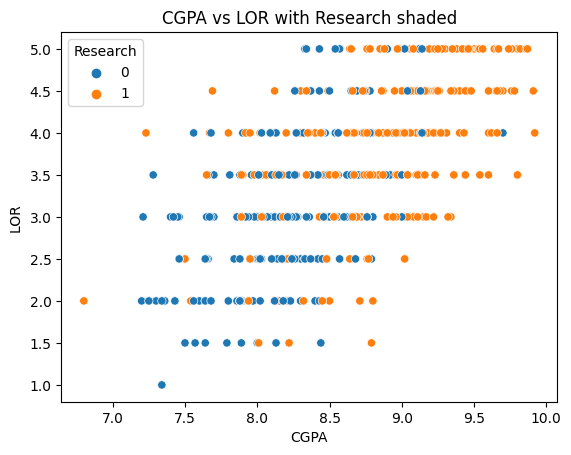

In [51]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("CGPA vs LOR with Research shaded")
plt.show()

##### People with High CGPA and LOR are more into Research as compared to students with lower CGPA.

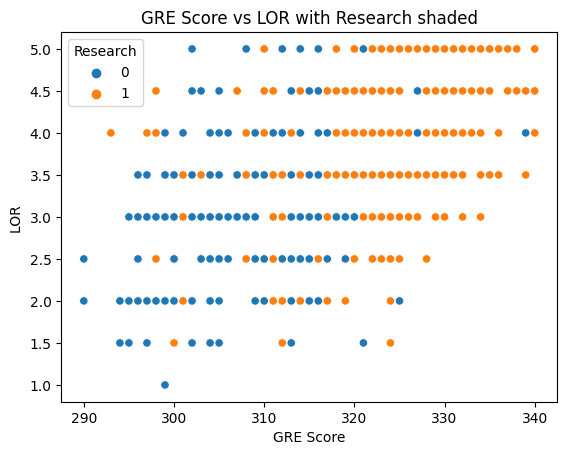

In [52]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs LOR with Research shaded")
plt.show()


##### Here also we see that People with High GRE Score and LOR are more prone to having Research experience than otherwise.

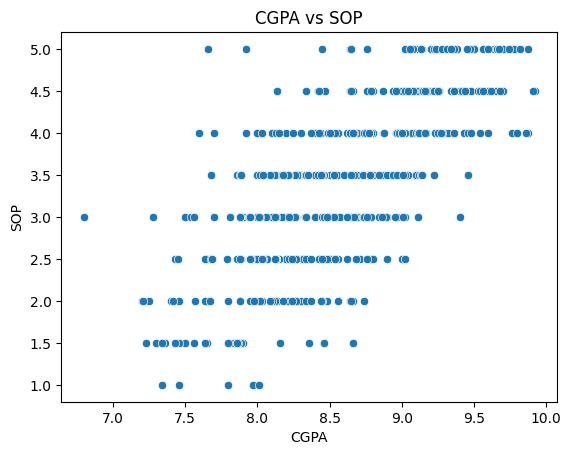

In [54]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("CGPA vs SOP")
plt.show()

##### Generally people with Higher CGPA also have slightly higher SOP Strength.

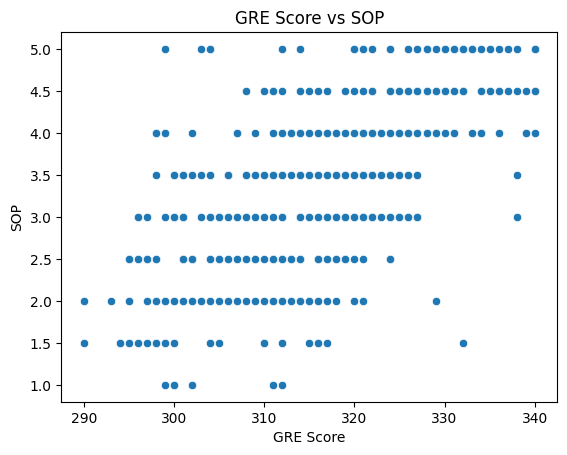

In [55]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs SOP")
plt.show()

##### Similarly we can say People with High GRE Score are more likely to have stronger SOP.

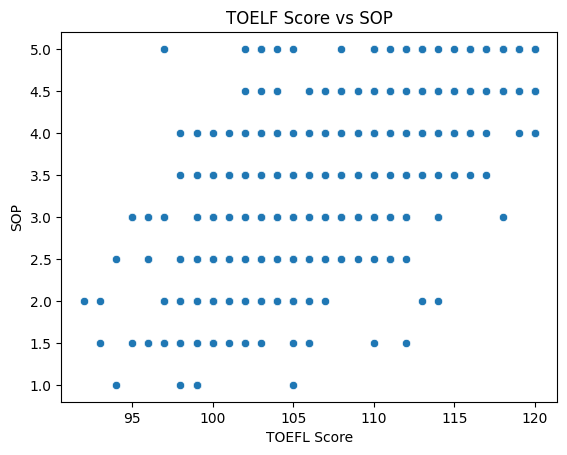

In [56]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=df)
plt.title("TOELF Score vs SOP")
plt.show()

##### Here We do not see much relation between Higher TOELF Score and SOP.So Good English is not always related to stronger SOP.

##### Now we will find correlation among different variables.

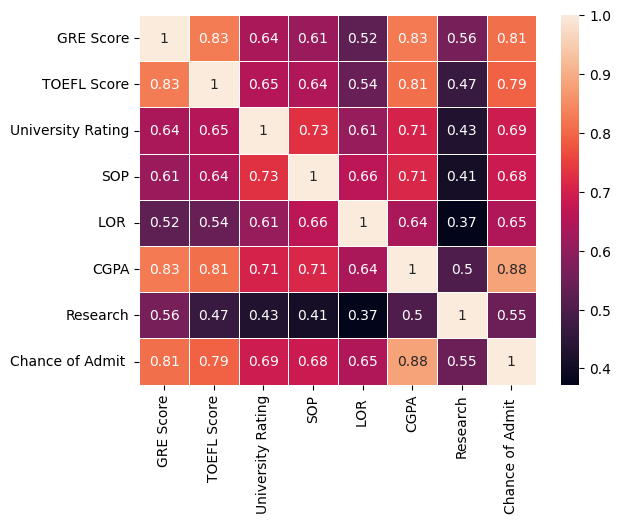

In [100]:
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()

##### This shows that CGPA followed by GRE Score and TOEFL have the highest correlation with Chance of Admit.

##### 

##### Now we will split the training data and the testing data.

In [101]:
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True) 

##### We will have 80 % of data as training data and 20% of data as testing data.

In [102]:
X_train.shape

(400, 7)

In [103]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
98,332,119,4,5.0,4.5,9.24,1
444,324,113,5,4.0,5.0,9.25,1
196,306,105,2,3.0,2.5,8.26,0
59,311,104,2,2.0,2.0,8.30,0
143,340,120,4,4.5,4.0,9.92,1


In [104]:
y_train.head()

98     0.90
444    0.92
196    0.73
59     0.42
143    0.97
Name: Chance of Admit , dtype: float64

In [105]:
y_train.shape

(400,)

##### We use StandardScaler in a machine learning problem to scale features, ensuring they have zero mean and unit variance. This preprocessing step helps algorithms converge faster, avoid undue influence of certain features, and improve overall model performance.

In [106]:
#Standardization 
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

In [107]:
X_train_std # This is a numpy array. Result after StandardScaler() is a Numpy array.

array([[ 1.38688495,  1.94301711,  0.7787718 , ...,  1.10461735,
         1.10840848,  0.92761259],
       [ 0.68433123,  0.96375607,  1.64167683, ...,  1.63440985,
         1.12482023,  0.92761259],
       [-0.89641463, -0.34192531, -0.94703828, ..., -1.01455263,
        -0.4999429 , -1.07803625],
       ...,
       [ 2.00161945,  1.94301711,  1.64167683, ...,  0.57482486,
         1.86334893, -1.07803625],
       [-0.45731856, -0.50513549, -0.08413324, ..., -1.54434512,
        -0.59841339,  0.92761259],
       [-1.862426  , -1.81081687, -0.94703828, ..., -1.54434512,
        -2.00982379, -1.07803625]])

In [108]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns) # Converting the Numpy array back to a DataFrame.
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.386885,1.943017,0.778772,1.607505,1.104617,1.108408,0.927613
1,0.684331,0.963756,1.641677,0.616747,1.634410,1.124820,0.927613
2,-0.896415,-0.341925,-0.947038,-0.374011,-1.014553,-0.499943,-1.078036
3,-0.457319,-0.505135,-0.947038,-1.364769,-1.544345,-0.434296,-1.078036
4,2.089439,2.106227,0.778772,1.112126,0.574825,2.224407,0.927613
...,...,...,...,...,...,...,...
395,1.035608,1.453387,1.641677,1.112126,1.634410,0.845821,0.927613
396,1.035608,0.474126,0.778772,1.607505,0.574825,0.944291,0.927613
397,2.001619,1.943017,1.641677,1.112126,0.574825,1.863349,-1.078036
398,-0.457319,-0.505135,-0.084133,0.121368,-1.544345,-0.598413,0.927613


##### The data above is perfectly sclaed and fit for applying model.

##### We will use Three different algorithms to see which one does better.

In [109]:
models = [
          ['Linear Regression :', LinearRegression()],
          ['Lasso Regression :', Lasso(alpha=0.1)], #We can also try this with different alpha values
          ['Ridge Regression :', Ridge(alpha=1.0)] #We can also try this with different alpha values
         ]
print("Results without removing features with multicollinearity ...")
for name,model in models:
    model.fit(X_train, y_train.values) # For fitting/Training the model.
    predictions = model.predict(std.transform(X_test)) # Creating the predictions.
    print(name, (np.sqrt(mean_squared_error(y_test, predictions)))) # For printing Root mean squared Error Value.

Results without removing features with multicollinearity ...
Linear Regression : 0.054664380219277595
Lasso Regression : 0.10835717463468501
Ridge Regression : 0.054609332049199114


C:\Python\Python38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Python\Python38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Python\Python38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


##### Above We see that the Error is highest for Lasso Regression and almost same for Linear and Ridge Regression.

#### Now, We will also try Linear Regression using Statsmodel Library.

##### Definitions for statistics that Statsmodel Returns:

##### Statsmodel gives us various other statistical features helpful for our analysis.

In [120]:
X_train = sm.add_constant(X_train) # Adding constant column to the dataset. 
model = sm.OLS(y_train.values, X_train).fit() # Training the model using Ordinary Least squared
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.3
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          2.73e-142
Time:                        06:13:59   Log-Likelihood:                 553.05
No. Observations:                 400   AIC:                            -1090.
Df Residuals:                     392   BIC:                            -1058.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7183      0.00

##### Adjusted R square is less than R Square as it penalizes for having more number of useless features.

##### H0: Feature has no correlation
##### H1: Feature has correlation with dependant feature.
##### For SOP, the value is greater than 0.05 , So We fail to reject the null hypothesis. It means SOP has no correlation.
##### So We can drop SOP column from the dataset as it is very less relevant.
##### We remove only one Column at a time. 
 

In [121]:
X_train_n=X_train.drop(columns='SOP') # Dropping the SOP Column.

##### Training the model again.

In [123]:
model1 = sm.OLS(y_train.values, X_train_n).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.9
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          1.61e-143
Time:                        06:15:38   Log-Likelihood:                 552.99
No. Observations:                 400   AIC:                            -1092.
Df Residuals:                     393   BIC:                            -1064.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7183      0.00

## VIF (Variance Inflation Factor)

##### VIF or "Variance Inflation Factor" is a statistical measure used in regression analysis to assess the severity of multicollinearity among predictor variables. 

##### The closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.
##### Generally, a VIF greater than 5 or 10 is considered a cause for concern, suggesting that multicollinearity may be adversely affecting the regression results.

## Function to Calculate VIF for all the Columns

In [124]:
def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif

In [125]:
calculate_vif(X_train_n,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.409448
2,TOEFL Score,3.871855
3,University Rating,2.358653
4,LOR,1.941919
5,CGPA,4.831122
6,Research,1.501476


##### Here VIF is not greater that 5 for any of the variables. So we don't have to remove any of the features and can proceed ahead with the predictions.

In [130]:
X_test_std= std.transform(X_test)
X_test=pd.DataFrame(X_test_std, columns=X_train_columns) 
X_test = sm.add_constant(X_test)
X_test_del=list(set(X_test.columns).difference(set(X_train_n.columns)))
print(f'Dropping {X_test_del} from test set')
#Dropping ['SOP'] from test set
X_test_n=X_test.drop(columns=X_test_del)
#Prediction from the clean model
pred = model1.predict(X_test_n)
print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))

Dropping ['SOP'] from test set
Mean Absolute Error  0.043070683238370225
Root Mean Square Error  0.054664190677315254


##### This above RMSE Value is similar to the Ridge Regression RMSE value achieved earlier.

### Mean of Residuals

In [132]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.0006809226898497939


## Homoscedasticity Test

Homoscedasticity, in short, refers to a property of a statistical model where the variance of the errors (or residuals) is constant across all levels of the independent variables. In other words, it implies that the spread or dispersion of the data points around the regression line is consistent across the range of the predictor variable(s).

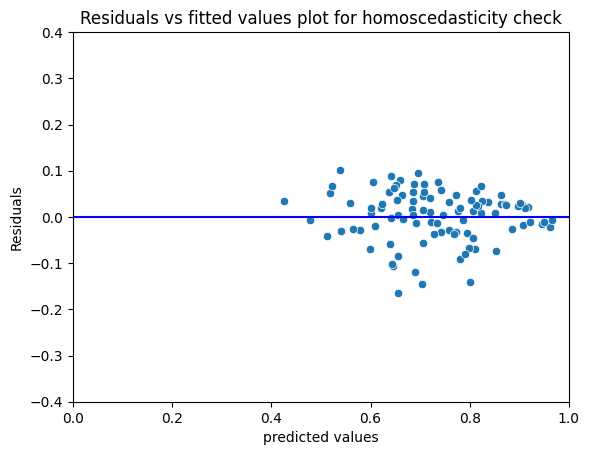

In [134]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [136]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 1.2882386901385976), ('p-value', 0.20760549208856632)]

##### H0 : Null hypothesis : Error terms are homoscedastic.
##### Since p-values >0.05, we fail to reject the null hypothesis.

## Normality of Residuals

C:\Users\Dell\AppData\Local\Temp\ipykernel_21288\3040778317.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


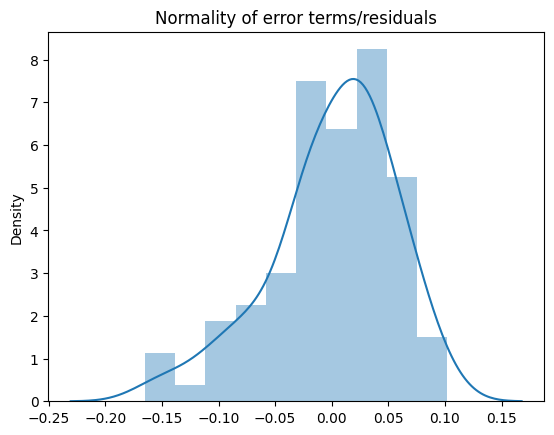

In [137]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Text(0, 0.5, 'y_pred')

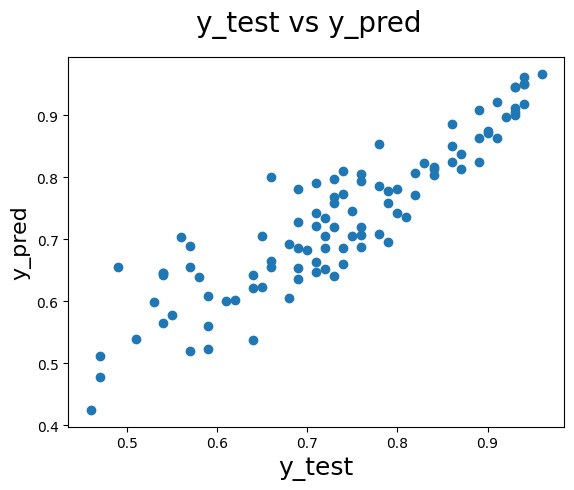

In [138]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20)# Plot heading 
plt.xlabel('y_test', fontsize=18)# X-label
plt.ylabel('y_pred', fontsize=16)# Y-label

##### We observe that there is a better fit for Higher values of y_test and y_pred.

# Recommendations

-> Country is an important factor and should be added to the data. For example, an Indian Student even with a high score will have a low chance of an ivy league compared to an African student.

-> Since University Rating and SOP strength have no statistical importance in predicting the chance of admission they can be removed from the website.

-> Since CGPA has the highest importance as compared to all other features, a further study can be made to find the threshold of CGPA required for admissions

-> Research experience has the least importance in contributing to chances of admission and hence can be made an optional field or can even be omitted.

-> GRE score, TOEFL score, and strength of LOR have the same weightage for Chance of admission and students can be advised that a very high score in one can cover for low score in others.

-> These insights and predictions have an accuracy of around 81% and this may be because of a lack of data. The same study must be performed with a significantly larger dataset for more accurate insights